In [1]:
import pandas as pd
import seaborn as sns
true = pd.read_csv('data/True.csv')
fake = pd.read_csv('data/Fake.csv')
true.head(3)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [2]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [3]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [4]:
true['label'] = 1
fake['label'] = 0

In [5]:
frames = [true.loc[:][:], fake.loc[:][:]]
df = pd.concat(frames)
df.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [6]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
sns.countplot(data = df, x = 'label')

NameError: name 'plt' is not defined

In [ ]:
plt.style.use('seaborn-pastel')
plt.figure(figsize = (10, 7))
sns.countplot(data = df, x = "Year", hue = "label")

NameError: name 'plt' is not defined

<AxesSubplot: xlabel='Month', ylabel='count'>

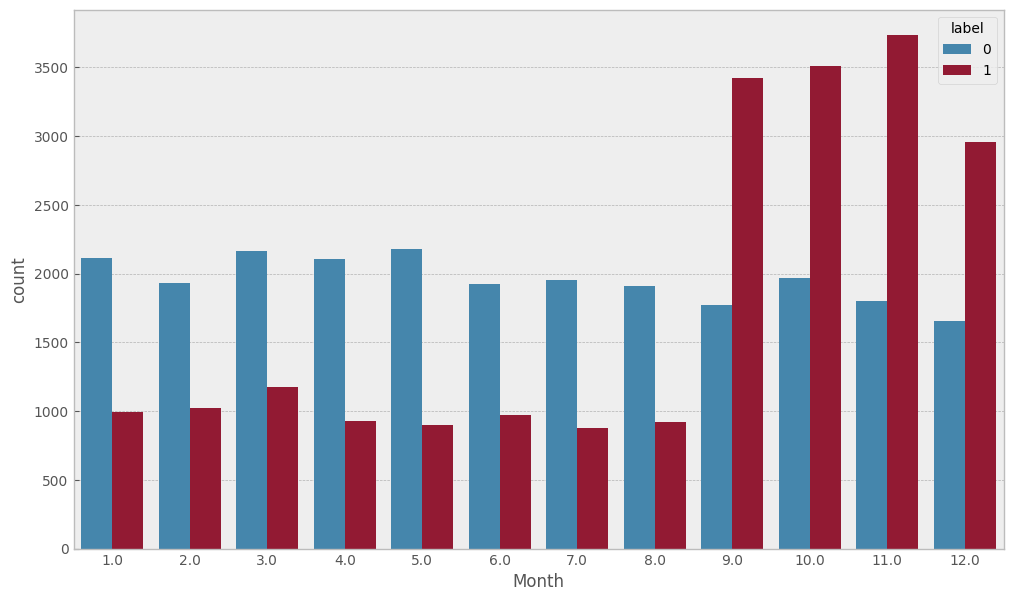

In [ ]:
plt.style.use('bmh')
plt.figure(figsize = (12, 7))
sns.countplot(data = df, x = "Month", hue="label")

In [ ]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_20284\2804211826.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


<AxesSubplot: xlabel='Year', ylabel='count'>

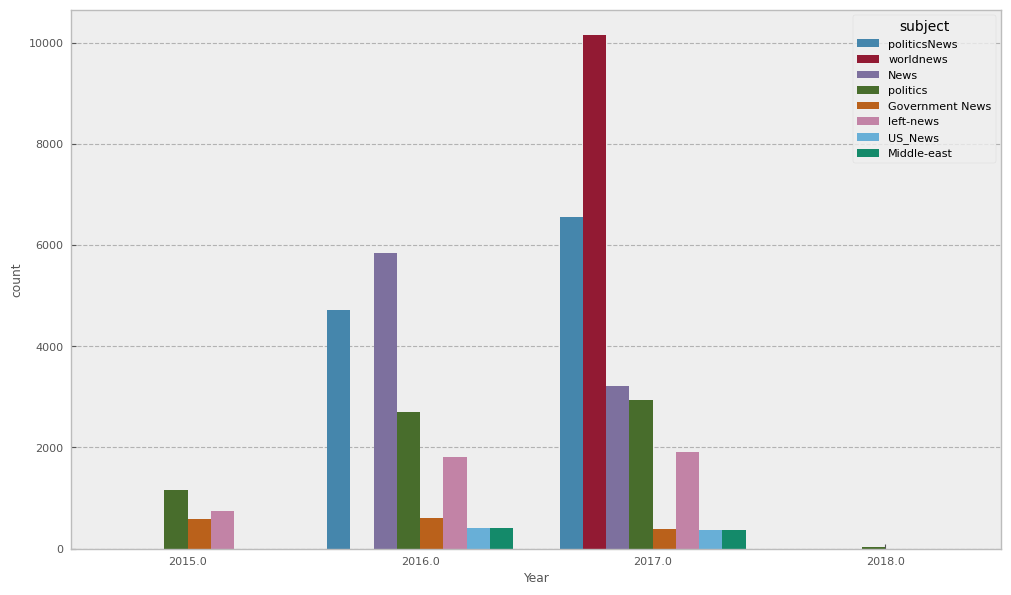

In [ ]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(12, 7))
sns.countplot(data = df, x = "Year", hue="subject")

In [ ]:
# Separate the value
frames = [true.loc[:200][:], fake.loc[:200][:]]
df = pd.concat(frames)
X = df.drop('label', axis = 1)
y = df['label']


df = df.dropna()
df2 = df.copy()
df2.reset_index(inplace = True)


In [ ]:
# Text processing 


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

nltk.download('stopwords')
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()
y = df2['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import numpy as np
import itertools
classifier = PassiveAggressiveClassifier(max_iter=1000)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.988


Text(0.5, 1.0, 'Confusion Matrix')

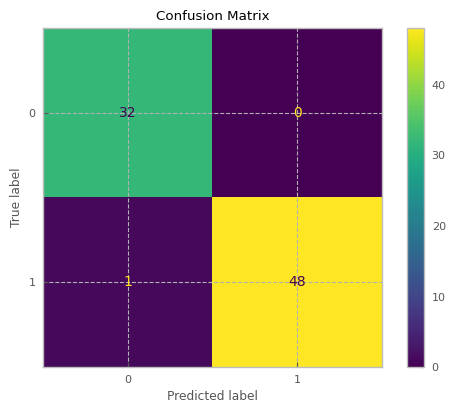

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")


In [ ]:
# Tokenization
review = re.sub('[^a-zA-Z]', ' ', fake['text'][100])
review = review.lower()
review = review.split() 
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
# Vectorization
val = tfidf_v.transform([review]).toarray()
# Predict 
classifier.predict(val)


array([0], dtype=int64)

In [ ]:
import pickle
pickle.dump(classifier, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))

In [ ]:
# Load model and vectorizer
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))
val_pkl = joblib_vect.transform([review]).toarray()
joblib_model.predict(val_pkl)

array([0], dtype=int64)

In [ ]:
model = pickle.load(open('model2.pkl', 'rb'))
tfidfvect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [ ]:
def predict(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    review_vect = tfidfvect.transform([review]).toarray()
    prediction = 'FAKE' if model.predict(review_vect) == 0 else 'REAL'
    return prediction

text = "Donald Trump Sends Out Embarrassing New Year's Eve Message"
prediction = predict(text)
print(prediction)

FAKE
